# WeatherPy
----

### Summary of WeatherPy

#### Code Analysis & Experience:

Using a random structure was a quite informative and novel exercise given so many data points that were available to be analised, tabulated and plotted. As each time the code (Kernel) was restarted and output cleared a different set of cities and the related data within the Northern and Southern Hemisphere showed only modest changes with respect to the weather outputs along the reandomly generated latitudes and longtitudes.

To be honest, I found a fault in my code that represented maximum temperatures that exceeded 300 degrees F. After many attempts,I had noticed I had unintentionally left out units within the url query. As a result, this skewed my results significantly in that regard, however the plots had minimal change (in terms of visual comparisons). Once I had rectified the issue, my maximum temperatures lowered to a more reasonable and believable max F.

A second great learning experience was the annotation within my Linear Regressions. Running through the diagrams I noticed something wrong - I could not see some of the results displayed within the figure and some I could see off centre or in areas where you could not acurately visualise what it was representing. As a result of researching - I found myself feeling a little foolish as I had left the annotation at 0, 0. So a simple mistake but one I was happy to fix and test to see where the best place was to locate it within the model/diagrams to give a clearer and better visual impact. The problem here is if you refresh the kernel, it will again change the data output positioning. This is somewhat of an issue as it will have to be changed again to give the best VISUAL aspect. 

The step by step process, of creating a Python script to locate cities, then numpy to randomly select and OpenweatherPy to link all of the data together was a great experience to see and learn the power of adding layer upon layer of initial data to present a final product (in this notebook) of scatter plots and linear regression models.

#### General Analysis:

For all scatter plots and linear regression models there are summaries for each listed, as per the instructions with the exception of the scatterplots. Here I have added many observations and trends that can account for differences and / or similarities between each.

Having said that - the primary (or initial question) of: -

"What's the weather like as we approach the equator?"

Now, we know what you may be thinking: _"Duh. It gets hotter..."_

But, if pressed, how would you **prove** it?

Well, there is some truth to it being hotter closer to the equator - however looking into it closer - you will see that in particular, the Southern Hemisphere has higher temperatures at lower (from the base of the equator) latitudes in many instances. This can be attributed to many factors, and land mass and positioning is one. If you scroll through the data saved in the .csv file you will see a varying difference dependent upon land mass / location.

A clear example is in the original.csv file. Australia - Perth (Lat -31.3) has a max temp average of 79'F However, average for Australia is 85.29'F with Latitudes ranging from -12.23 through -42.88.

In this instance, the closer you are to the equator it would seem the hotter it would be as logic suggests. However -12.23 latitude (Nhulunbuy) max temp is 82.4'F as where -42.88 (Hobart) had a max temp of 86'F

Another example is proximity to oceans, and oceanic currents and atmospheric elements.

In the above example, humidity changes significantly between the two. The closer you are in the Southern Hemisphere to the equator, generally the higher the humidity closer to the coast. Nhulunbuy's humidity is a staggering 89% as where Hobart's was 41%. Both are coastal townships/cities. 

In the Northern Hemisphere, taking similar co-ordinates, Erie, a city in Pennsylvania (Lat 42.77) has a humidity of 82% and max temp of 9'F. Hilo, in the state of Hawaii, often considered a tropical place at latitude 19.73 has a humidity lower at 73% and a higher max temp 75.2.

Hobart and Pennsylvania both have cooler waters surrounding them as where Hilo and Nhulunbuy are surrounded by warmer waters.

Lastly and in conclusion - perhaps the biggest point to make here also, is the point in time when the data was taken. The difference of the tilt and rotation of the Earth itself will have an enourmous change on the data. When this data was taken it is clear that it is winter in the Northern Hemisphere and summer in the Southern Hemisphere. A better analysis would be achieved with the same data set for either the winter or summer periods.


In [1]:
import requests
import json
import pandas as pd
import numpy as np
from citipy import citipy
from config import api_key
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

weatherpy = "output_data/cities.csv"

In [2]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat = []
lng = []
cities = []

# Create a set of random lat and lng combinations
lat = np.random.uniform(-90.0, 90.0, size=2000)
lng = np.random.uniform(-180, 180, size=2000)
lat_lng = zip(lat, lng)

# Identify nearest city for each lat, lng combination
for item in lat_lng:
    city = citipy.nearest_city(item[0], item[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

738

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#new data frame

city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []


count_one = 0
set_one = 1

print("Begining Data Retrieval")
print(f"-------------------------------")

for city in cities:
    try:
        response = requests.get(query_url + city).json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])

        if count_one > 49:
            count_one = 0
            set_one += 1
            
        else:
            count_one += 1
            
                        
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    
    except Exception:
           
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Begining Data Retrieval
-------------------------------
City not found. Skipping...
Processing Record 1 of Set 1 | iranshahr
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | carnarvon
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | xining
Processing Record 6 of Set 1 | san cristobal
Processing Record 7 of Set 1 | lebu
Processing Record 8 of Set 1 | jamestown
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 9 of Set 1 | axim
Processing Record 10 of Set 1 | mineros
Processing Record 11 of Set 1 | new norfolk
Processing Record 12 of Set 1 | qaanaaq
Processing Record 13 of Set 1 | bilibino
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | galle
City not found. Skipping...
Processing Record 16 of Set 1 | athens
Processing Record 17 of Set 1 | el reno
Processing Record 18 of Set 1 | pacific grove
Processing Record 19 of Set 1 | yar-sale
Processing Record 20 of Set 1 |

Processing Record 32 of Set 4 | rio gallegos
Processing Record 33 of Set 4 | tongliao
Processing Record 34 of Set 4 | half moon bay
Processing Record 35 of Set 4 | vanavara
Processing Record 36 of Set 4 | flin flon
Processing Record 37 of Set 4 | tuy hoa
Processing Record 38 of Set 4 | upata
Processing Record 39 of Set 4 | atuona
Processing Record 40 of Set 4 | praxedis guerrero
Processing Record 41 of Set 4 | santa maria
Processing Record 42 of Set 4 | tigil
Processing Record 43 of Set 4 | touros
Processing Record 44 of Set 4 | chuy
Processing Record 45 of Set 4 | assentoft
Processing Record 46 of Set 4 | harper
Processing Record 47 of Set 4 | sechura
Processing Record 48 of Set 4 | kurayoshi
Processing Record 49 of Set 4 | avarua
Processing Record 50 of Set 4 | misratah
Processing Record 0 of Set 5 | dzaoudzi
Processing Record 1 of Set 5 | yiyang
City not found. Skipping...
Processing Record 2 of Set 5 | coquimbo
Processing Record 3 of Set 5 | vao
Processing Record 4 of Set 5 | luyan

Processing Record 17 of Set 8 | bergen
Processing Record 18 of Set 8 | fez
Processing Record 19 of Set 8 | samaipata
Processing Record 20 of Set 8 | hobyo
Processing Record 21 of Set 8 | krivosheino
Processing Record 22 of Set 8 | sandwick
City not found. Skipping...
Processing Record 23 of Set 8 | sokoni
Processing Record 24 of Set 8 | kattivakkam
Processing Record 25 of Set 8 | kahului
Processing Record 26 of Set 8 | banda aceh
Processing Record 27 of Set 8 | beeskow
Processing Record 28 of Set 8 | grand gaube
Processing Record 29 of Set 8 | porkhov
Processing Record 30 of Set 8 | darovskoy
Processing Record 31 of Set 8 | walvis bay
Processing Record 32 of Set 8 | vuktyl
Processing Record 33 of Set 8 | tuatapere
City not found. Skipping...
City not found. Skipping...
Processing Record 34 of Set 8 | krasnoselkup
Processing Record 35 of Set 8 | viedma
Processing Record 36 of Set 8 | cabra
Processing Record 37 of Set 8 | spassk
Processing Record 38 of Set 8 | charleston
Processing Recor

Processing Record 1 of Set 12 | khandyga
Processing Record 2 of Set 12 | prainha
Processing Record 3 of Set 12 | marsa matruh
Processing Record 4 of Set 12 | darnah
Processing Record 5 of Set 12 | baykit
Processing Record 6 of Set 12 | ambulu
Processing Record 7 of Set 12 | naze
Processing Record 8 of Set 12 | mulheim-karlich
Processing Record 9 of Set 12 | zyryanovsk
Processing Record 10 of Set 12 | lata
Processing Record 11 of Set 12 | kindu
City not found. Skipping...
Processing Record 12 of Set 12 | bom jesus
Processing Record 13 of Set 12 | saint-louis
City not found. Skipping...
Processing Record 14 of Set 12 | dese
Processing Record 15 of Set 12 | ramna
Processing Record 16 of Set 12 | karlskrona
Processing Record 17 of Set 12 | vallenar
Processing Record 18 of Set 12 | petropavlovka
Processing Record 19 of Set 12 | akdagmadeni
Processing Record 20 of Set 12 | massaguet
Processing Record 21 of Set 12 | san lawrenz
Processing Record 22 of Set 12 | morgan city
City not found. Skip

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weatherpy = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity":humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp":max_temp,
    "Wind Speed":wind_speed
}

weatherpy = pd.DataFrame(weatherpy)

weatherpy.count()

City          677
Cloudiness    677
Country       677
Date          677
Humidity      677
Lat           677
Lng           677
Max Temp      677
Wind Speed    677
dtype: int64

In [6]:
# Display data frame head 
weatherpy.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Iranshahr,0,IR,1614055139,42,27.2025,60.6848,62.60,6.91
1,Busselton,0,AU,1614055140,32,-33.6500,115.3333,87.03,7.45
2,Carnarvon,0,AU,1614054901,16,-24.8667,113.6333,105.80,12.66
3,Punta Arenas,75,CL,1614055140,57,-53.1500,-70.9167,44.60,6.91
4,Xining,58,CN,1614055140,36,36.6167,101.7667,48.70,2.95


In [7]:
weatherpy.to_csv('weatherpy.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.

In [9]:
weatherpy.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,677.000000,6.770000e+02,677.000000,677.000000,677.000000,677.000000,677.000000
mean,47.868538,1.614055e+09,73.223043,21.137060,15.944705,49.988346,7.944549
std,39.342099,1.101223e+02,20.230306,32.601745,89.921982,32.623877,5.934242
min,0.000000,1.614055e+09,13.000000,-54.800000,-179.166700,-33.560000,0.250000
25%,2.000000,1.614055e+09,65.000000,-5.198900,-63.866700,34.160000,3.440000
50%,42.000000,1.614055e+09,79.000000,27.725300,21.286900,59.520000,6.910000
75%,90.000000,1.614055e+09,88.000000,49.000000,96.370000,75.200000,11.120000
max,100.000000,1.614055e+09,100.000000,78.218600,179.316700,105.800000,43.730000


Step skipped due to no humidity over 100%

In [10]:
weatherpy[weatherpy['Humidity'] > 100].index

Int64Index([], dtype='int64')

There are no cities where humidity is over 100%

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

In [12]:
clean_city_data = weatherpy.drop(weatherpy[weatherpy['Humidity'] > 100].index, inplace=False)
clean_city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Iranshahr,0,IR,1614055139,42,27.2025,60.6848,62.60,6.91
1,Busselton,0,AU,1614055140,32,-33.6500,115.3333,87.03,7.45
2,Carnarvon,0,AU,1614054901,16,-24.8667,113.6333,105.80,12.66
3,Punta Arenas,75,CL,1614055140,57,-53.1500,-70.9167,44.60,6.91
4,Xining,58,CN,1614055140,36,36.6167,101.7667,48.70,2.95


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

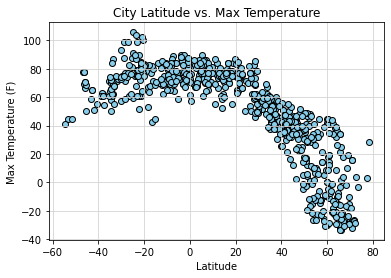

In [13]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

plt.savefig("Fig 1 City Latitude vs. Humidity.png")
plt.show()

Figure 1. There is a clear disparity between the Northern and Southern Hemisphere. This can generally be attributable by geography. The Northern Hemisphere has a disproportionate amount of land mass, especially in the higher lattitudes which combined with the localities of so many cities having the dual effect of proximity to polar (Arctic) influences and large masses of landscapes where mountains (height) play major roles in climate variance. There is also a significant proportioin of land on/near the equator. 

## Latitude vs. Humidity Plot

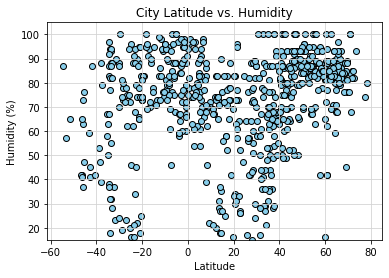

In [14]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Fig 2 City Latitude vs. Humidity.png")
plt.show()

Figure 2. Like Figure 1, shows a stark contrast in humidity levels per city the closer you get to the polar regions. However there is a significant point to make here. There are no large land masses or cities close to the southern polar region as compared to the northern. Nearly all continents, and hence cities in the Northern Hemisphere boarder the Arctic circle or are close enough to have moist air flowing south towards the populated areas, This is also influenced by the Atlantic Thermocline which although is not mentioned or noted in these data sets, drags coldwater south and brings the warmer waters north impacting the humidity levels. As another note, and as one would expect, humidity is generally higher in the tropical regions between 27.5 and -27.5 latitude.

## Latitude vs. Cloudiness Plot

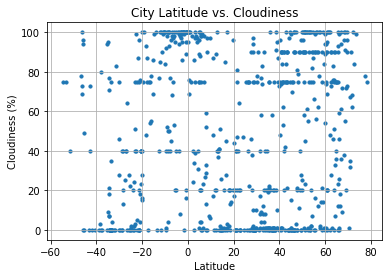

In [15]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Cloudiness"], marker="o", s=10)
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Fig 3 Cloudiness_vs_Latitude.png")

plt.show()

Figure 3. The dataset shows clearly a sparodic scattering of cloudiness across all regions defined. There is no primary trend here with the exception of a lack of data below -60 degrees latitude as there are very few cities (or weather stations for that matter) below this point. It does however show where the dataset cities are located primarily.  

## Latitude vs. Wind Speed Plot

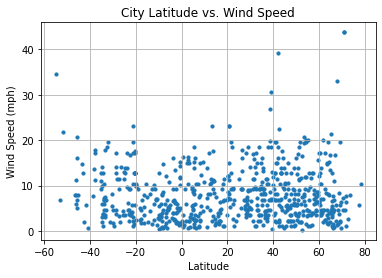

In [16]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Wind Speed"], marker="o", s=10)
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Fig 4 Wind_Speed_vs_Latitude.png")

plt.show()

Figure 4 shows a distinct increase in wind speeds in the northern latitudes such as KlaksvÃk 43.73mph, 62.2266 lat. Again, as per figures prior mentioned the lack of data at lower latitudes in the Southern Hemisphere.

## Linear Regression

In [17]:
northern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] >= 0]
southern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [18]:
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

The r-squared is : -0.86


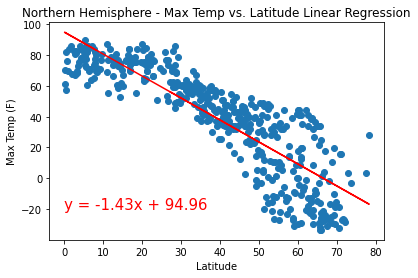

In [19]:
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])


annotate(equation, 0, -20)


plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")


plt.xlabel("Latitude")


plt.ylabel("Max Temp (F)")


plt.savefig("Fig 5 Northern Hemisphere Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.39


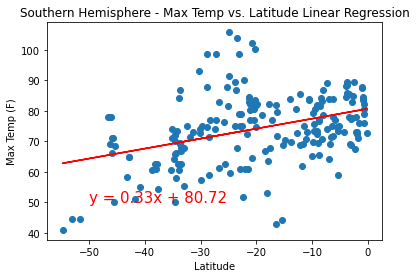

In [20]:
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])


annotate(equation, -50, 50)


plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")


plt.xlabel("Latitude")


plt.ylabel("Max Temp (F)")


plt.savefig("Fig 6 Southern Hemisphere Max Temp vs. Latitude Linear Regression.png")

Figures 5 & 6 show that tempperature has a clear (but weak) correlation as cities are closer to the equator. Having said this - the Southern Hemisphere have a significant amount of land mass within proximity of the equator and close to the tropic of capricorn (-23.27 degrees). As a result you can see the the Linear Regression is flattened compared to the Northern Hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.32


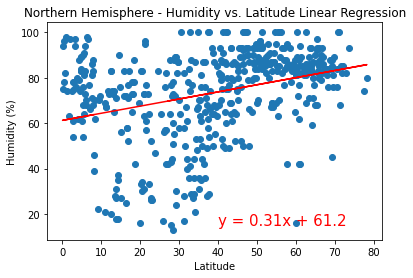

In [21]:
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])


annotate(equation, 40, 15)


plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")


plt.xlabel("Latitude")


plt.ylabel("Humidity (%)")


plt.savefig("Fig 7 Northern Hemisphere Humidity vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.38


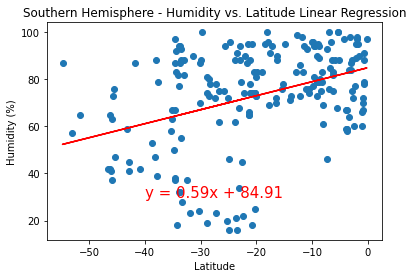

In [22]:
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])


annotate(equation, -40, 30)


plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")


plt.xlabel("Latitude")


plt.ylabel("Humidity (%)")


plt.savefig("Fig 8 Southern Hemisphere Humidity vs. Latitude Linear Regression.png")

Figures 7 & 8 Show a clear correlation that the closer you are to the equator - the higher the humidity. However, as seen in Fig 7, there is far more data points clustered for higher humidity levels across all latitudes. Again - there areconstraints on the data as more data points are collated in from the Northern Hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.17


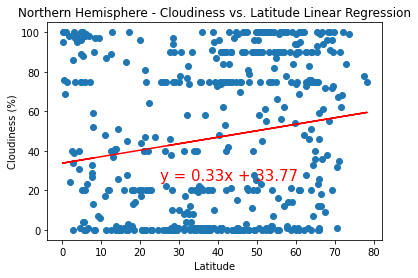

In [23]:
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])


annotate(equation, 25, 25)


plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")


plt.xlabel("Latitude")


plt.ylabel("Cloudiness (%)")


plt.savefig("Fig 9 Northern Hemisphere Cloudiness vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.46


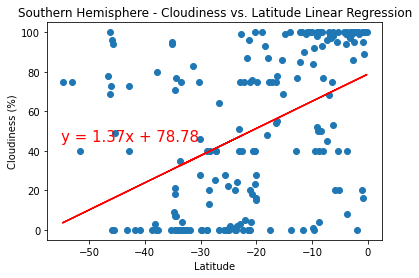

In [24]:
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])


annotate(equation, -55, 45)


plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")


plt.xlabel("Latitude")


plt.ylabel("Cloudiness (%)")


plt.savefig("Fig 10 Southern Hemisphere Cloudiness vs. Latitude Linear Regression.png")

Figures 9 & 10 unsurpringly, is significantly different given the variability between the differing seasons. As such there is not a great correlation as described previously.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.05


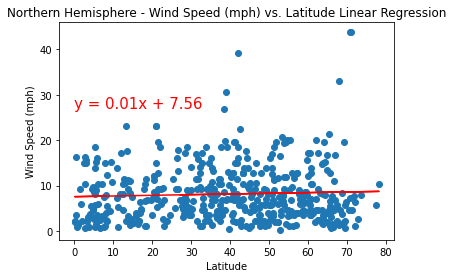

In [25]:
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])


annotate(equation, 0, 27)


plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")


plt.xlabel("Latitude")


plt.ylabel("Wind Speed (mph)")


plt.savefig("Fig 11 Northern Hemisphere Wind Speed vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.32


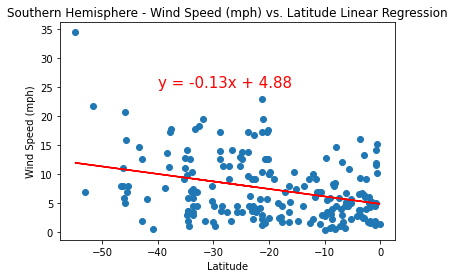

In [26]:
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])


annotate(equation, -40, 25)


plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")


plt.xlabel("Latitude")


plt.ylabel("Wind Speed (mph)")


plt.savefig("Fig 12 Southern Hemisphere Wind Speed vs. Latitude Linear Regression.png")

Figures 11 & 12 show an inverse relationship. As where in the Northern Hemisphere, winds are slightly higher towards the equator, in the Southern Hemisphere they are higher towards mid and lower latitudes latitudes. This is primarily due to what are commonly known as the 'roaring forties' and 'furious fifties' - these winds are present in both hemisphere's, however, given the lower number of data poiints for the Southern Hemisphere, it gives a much clearer visualisation.